# How much variability is there in different observables?

In [1]:
import itertools, json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import colors

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *

from common import *

In [2]:
L = 9

In [3]:
observables = ['fi', 'fij', 'cij', 'fijk', 'cijk', 'fold_ijk']
observables_dict = {key: dict() for key in observables}
for dataset in ['train', 'test']:
    params = np.load('data/%s_observables.npz'%dataset)
    for observable in observables:
        observables_dict[observable][dataset] = params[observable]

In [7]:
observables_dict['n3'] = dict()
for dataset in ['train', 'test']:
    matrix = load_matrix('data/%s_matrix_L%i.csv.gz'%(dataset, L))
    observables_dict['n3'][dataset] = calc_n3(to_aacounts(matrix))

In [10]:
bins = np.linspace(-1.5, 1.5)

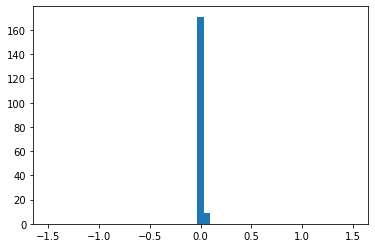

In [11]:
plt.hist(np.log2(observables_dict['fi']['train']/observables_dict['fi']['test']).flatten(),
         bins=bins);

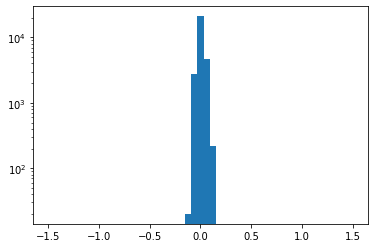

In [12]:
plt.hist(np.log2(flatten_ij(observables_dict['fij']['train'])
                / flatten_ij(observables_dict['fij']['test'])),
         bins=bins);
plt.yscale('log')

In [25]:
20**3, flatten_ij(observables_dict['fij']['test']).shape[0], 20**2 * 9 * 8, 20**2 * 8

(8000, 28800, 28800, 3200)

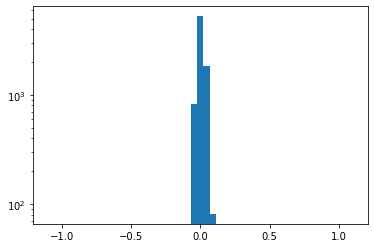

In [8]:
plt.hist(np.log2(observables_dict['n3']['train']/observables_dict['n3']['test']).flatten(),
         bins=bins);
plt.yscale('log')

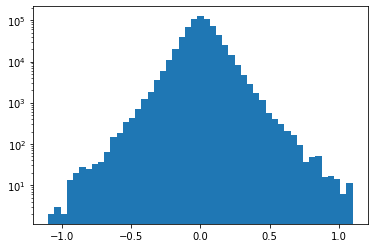

In [9]:
plt.hist(np.log2(flatten_ijk(observables_dict['fijk']['train'])
                / flatten_ijk(observables_dict['fijk']['test'])),
         bins=bins);
plt.yscale('log')